# Data Preparation

In [1]:
# import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import folium
from folium import plugins
from folium.plugins import HeatMap

In [2]:
# load the data
data2005_2007 = pd.read_csv('data/accidents_2005_to_2007.csv')
data2009_2011 = pd.read_csv('data/accidents_2009_to_2011.csv') 
data2012_2014 = pd.read_csv('data/accidents_2012_to_2014.csv') 
dataAADF = pd.read_csv('data/ukTrafficAADF.csv')

In [3]:
# concat data and format datetime
data = pd.concat([data2005_2007, data2009_2011, data2012_2014])
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', errors='coerce')
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [4]:
# pickle data to python binary file
data.to_pickle('data/data_pickle')

In [5]:
# read the data from python binary file
data = pd.read_pickle('data/data_pickle')

In [6]:
# drop redundant column data
data = data.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR'], axis=1)

In [7]:
# show the whole columns from the data
pd.Series(data.columns)

0                                  Accident_Index
1                                       Longitude
2                                        Latitude
3                                    Police_Force
4                               Accident_Severity
5                              Number_of_Vehicles
6                            Number_of_Casualties
7                                            Date
8                                     Day_of_Week
9                                            Time
10                     Local_Authority_(District)
11                      Local_Authority_(Highway)
12                                 1st_Road_Class
13                                1st_Road_Number
14                                      Road_Type
15                                    Speed_limit
16                                Junction_Detail
17                               Junction_Control
18                                 2nd_Road_Class
19                                2nd_Road_Number


# Traffic Accident Density

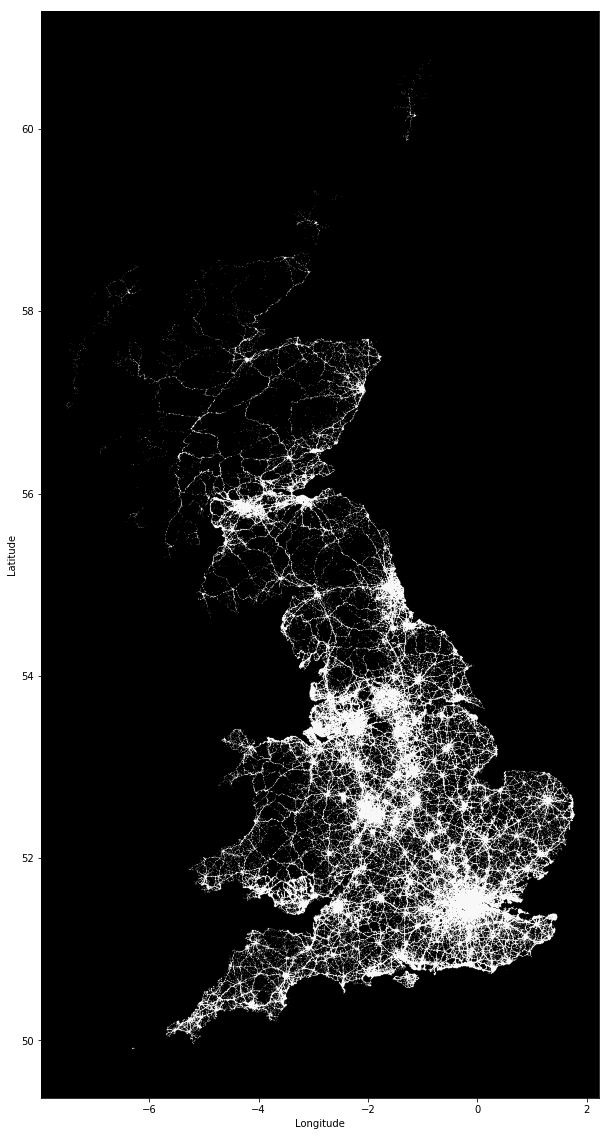

In [8]:
# draw the all traffic accident points on the map
ax = data.plot(kind='scatter', x='Longitude', y='Latitude', color='white', s=0.01, alpha=0.5, figsize=(10,20))
ax.set_facecolor('black')

# Traffic Accident Analytics: Accident Severity

In [9]:
# find out the categories from the data
levels = data['Accident_Severity'].unique()
levels.sort()
levels

array([1, 2, 3])

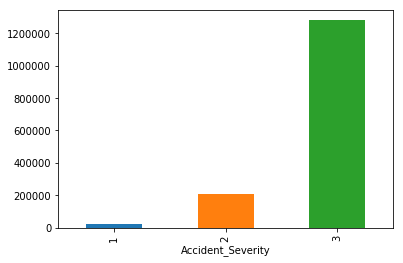

In [10]:
# draw a histogram to know the distribution
data.groupby('Accident_Severity').size().plot(kind='bar')
plt.show()

In [11]:
# sort the data by their categories
aslv1 = data[data['Accident_Severity'] == 1]
aslv2 = data[data['Accident_Severity'] == 2]
aslv3 = data[data['Accident_Severity'] == 3]

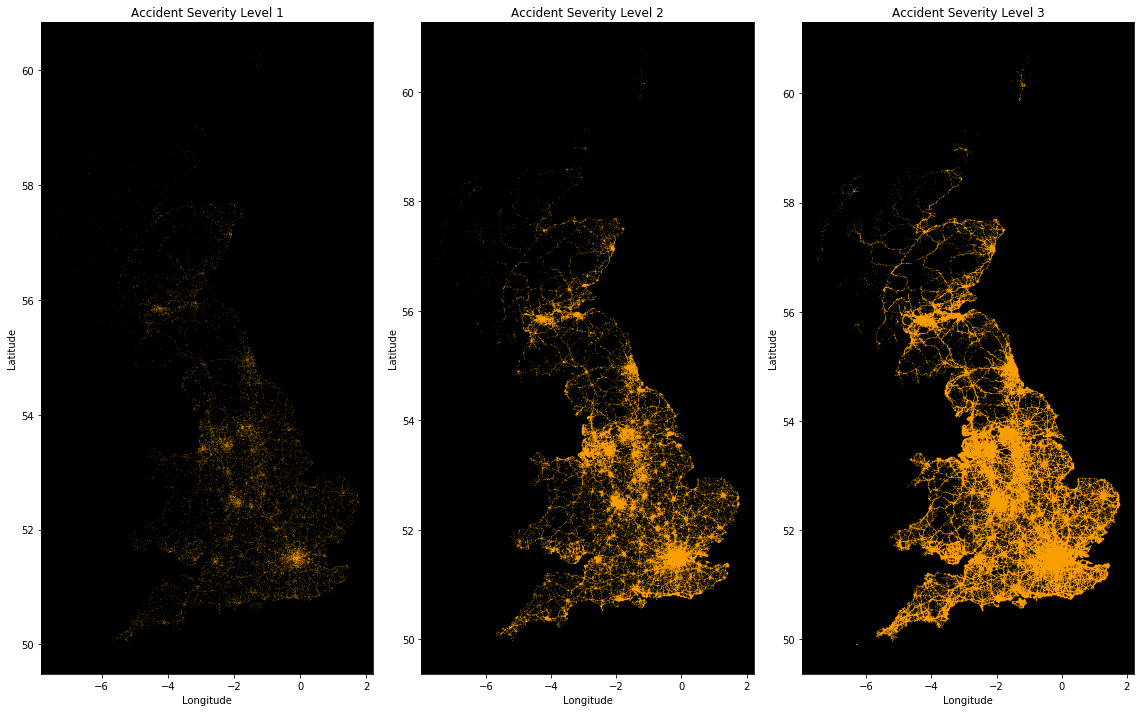

In [12]:
# use subplot to display different results about severity
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 10))
for i in range(1, 4):
    istr = str(i)
    aslv = eval('aslv' + istr)
    ax = eval('ax' + istr)
    aslv.plot(kind='scatter', x='Longitude', y='Latitude', color='orange',\
                             s=0.01, alpha=0.5, subplots=True, ax=ax)
    ax.set_facecolor('black')
    ax.set_title('Accident Severity Level ' + istr)

fig.tight_layout()
fig.show()

# Traffic Accident Analytics: Speed Limit

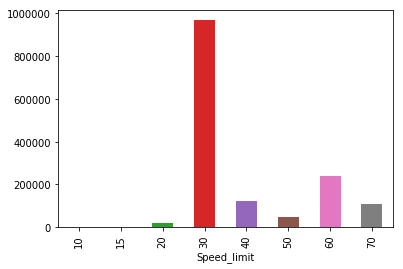

In [13]:
# draw a histogram to know the distribution
data.groupby('Speed_limit').size().plot(kind='bar')
plt.show()

In [14]:
# find out the categories from the data
speeds = data['Speed_limit'].unique()
speeds.sort()
speeds

array([10, 15, 20, 30, 40, 50, 60, 70])

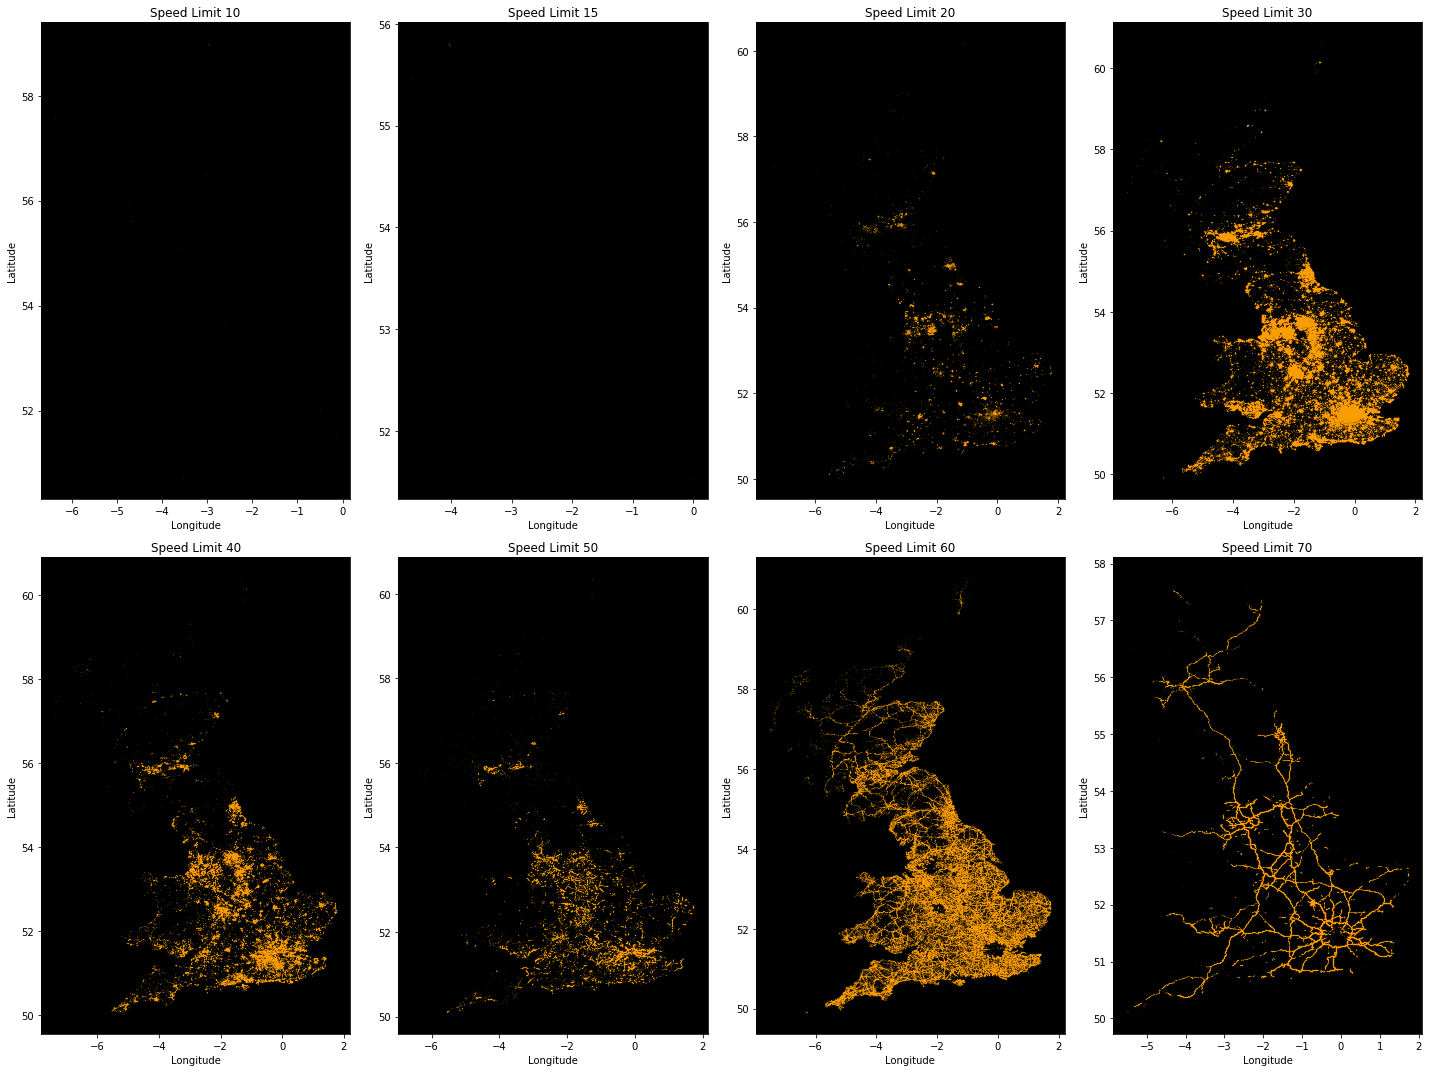

In [15]:
# use subplot to display different results about speed limit
fig, axn = plt.subplots(2, 4, figsize=(20, 15))
for i in range(1, 9):
    istr = str(i)
    splim = data[data['Speed_limit'] == speeds[i-1]]
    ax = axn.flatten()[i-1]
    splim.plot(kind='scatter', x='Longitude', y='Latitude', color='orange',\
                             s=0.01, alpha=0.5, subplots=True, ax=ax)
    ax.set_facecolor('black')
    ax.set_title('Speed Limit ' + str(speeds[i-1]))

fig.tight_layout()
fig.show()

# Traffic Accident Analytics: Road Type

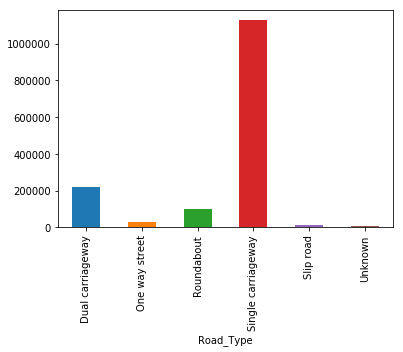

In [16]:
# draw a histogram to know the distribution
data.groupby('Road_Type').size().plot(kind='bar')
plt.show()

In [17]:
# find out the categories from the data
types = data['Road_Type'].unique()
types.sort()
types

array(['Dual carriageway', 'One way street', 'Roundabout',
       'Single carriageway', 'Slip road', 'Unknown'], dtype=object)

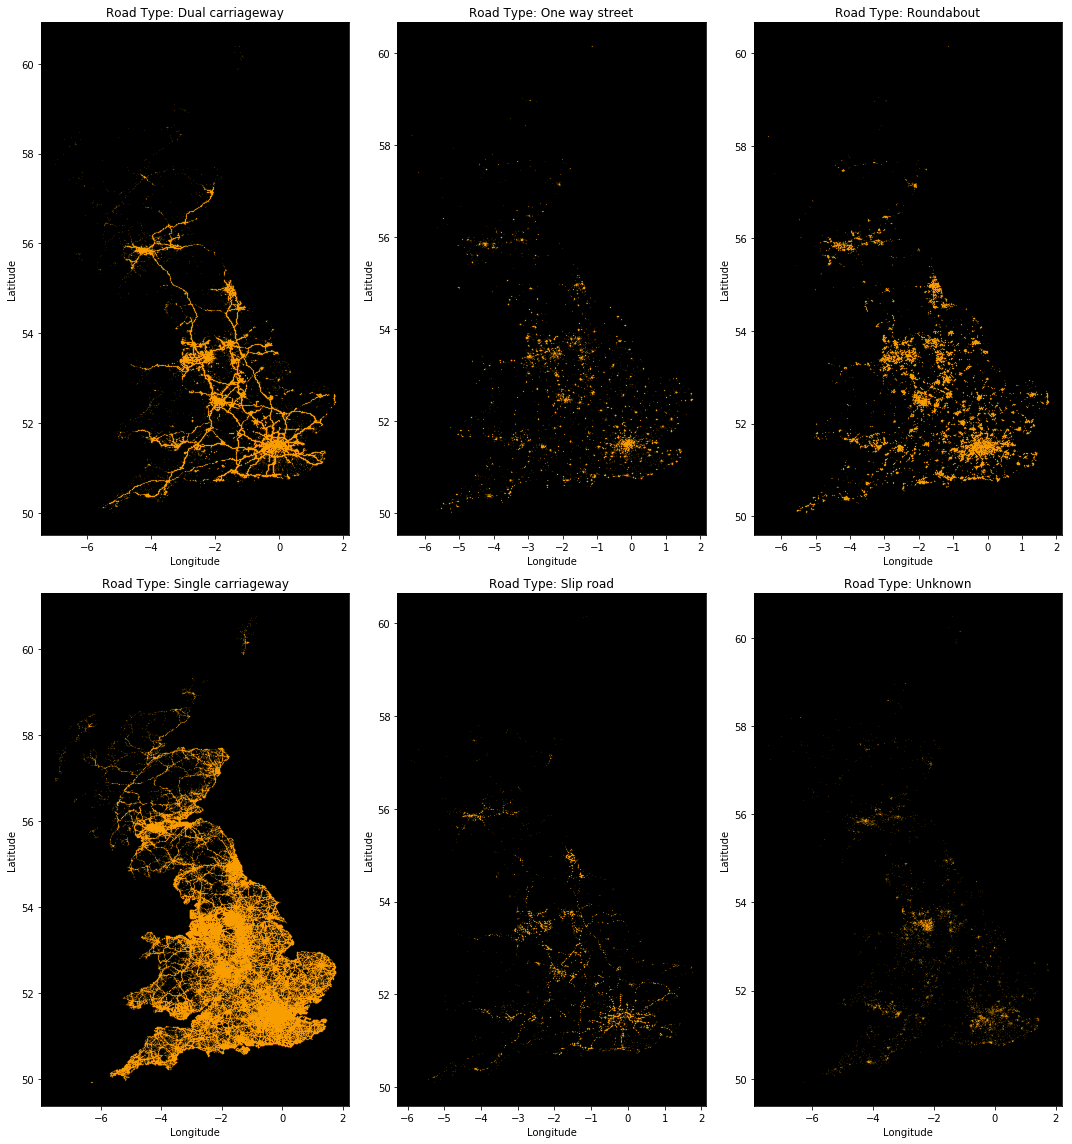

In [18]:
# use subplot to display different results about road types
fig, axn = plt.subplots(2, 3, figsize=(15, 16))
for i in range(1, 7):
    istr = str(i)
    rdtype = data[data['Road_Type'] == types[i-1]]
    ax = axn.flatten()[i-1]
    rdtype.plot(kind='scatter', x='Longitude', y='Latitude', color='orange',\
                             s=0.01, alpha=0.5, subplots=True, ax=ax)
    ax.set_facecolor('black')
    ax.set_title('Road Type: ' + str(types[i-1]))

fig.tight_layout()
fig.show()

# Traffic Accident Analytics: Light Conditions

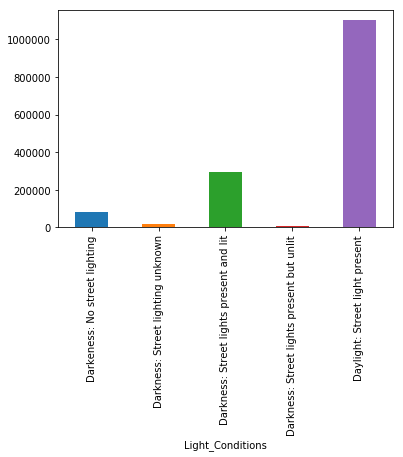

In [19]:
# draw a histogram to know the distribution
data.groupby('Light_Conditions').size().plot(kind='bar')
plt.show()

In [20]:
# find out the categories from the data
lights = data['Light_Conditions'].unique()
lights.sort()
lights

array(['Darkeness: No street lighting',
       'Darkness: Street lighting unknown',
       'Darkness: Street lights present and lit',
       'Darkness: Street lights present but unlit',
       'Daylight: Street light present'], dtype=object)

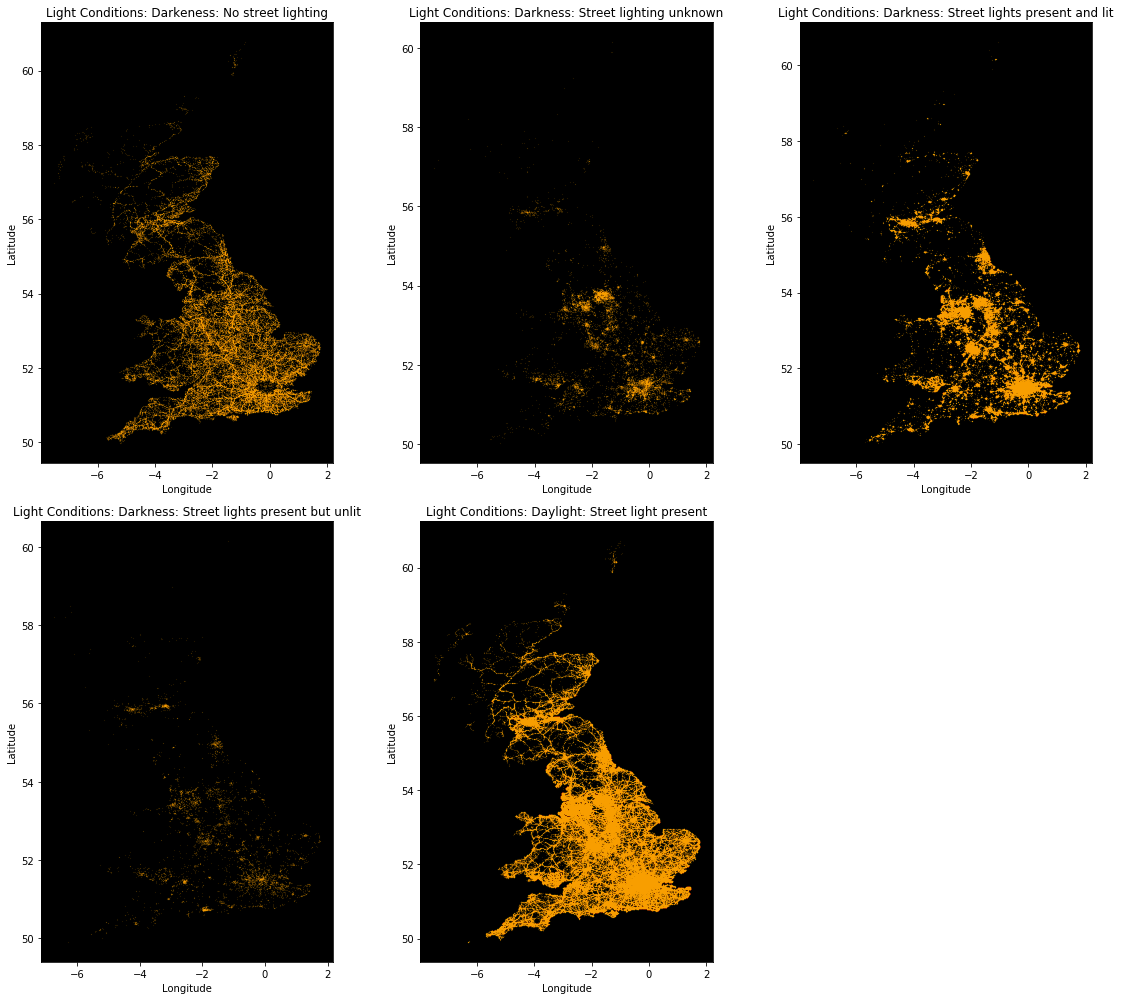

In [21]:
# use subplot to display different results about light condition
fig, axn = plt.subplots(2, 3, figsize=(16, 14))
for i in range(1, 6):
    istr = str(i)
    light_type = data[data['Light_Conditions'] == lights[i-1]]
    ax = axn.flatten()[i-1]
    light_type.plot(kind='scatter', x='Longitude', y='Latitude', color='orange',\
                             s=0.01, alpha=0.5, subplots=True, ax=ax)
    ax.set_facecolor('black')
    ax.set_title('Light Conditions: ' + str(lights[i-1]))

fig.delaxes(axn.flatten()[5])
fig.tight_layout()
fig.show()

# Traffic Accident Analytics: Weather Conditions

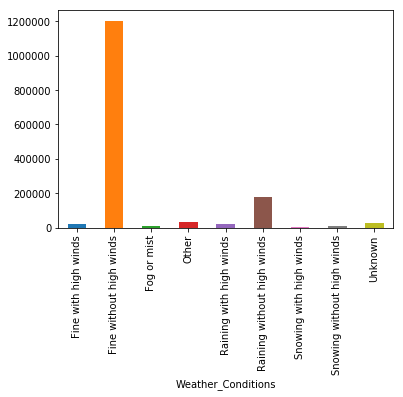

In [22]:
# draw a histogram to know the distribution
data.groupby('Weather_Conditions').size().plot(kind='bar')
plt.show()

In [23]:
# find out the categories from the data
weathers = data['Weather_Conditions'].dropna().unique()
weathers.sort()
weathers

array(['Fine with high winds', 'Fine without high winds', 'Fog or mist',
       'Other', 'Raining with high winds', 'Raining without high winds',
       'Snowing with high winds', 'Snowing without high winds', 'Unknown'],
      dtype=object)

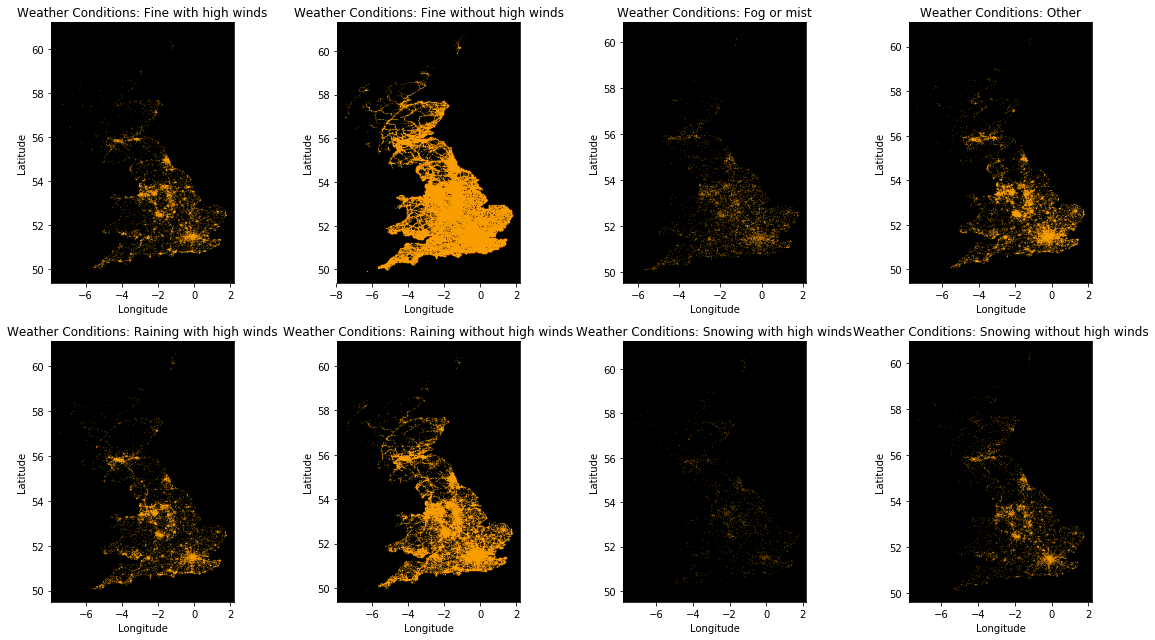

In [24]:
# use subplot to display different results about weather condition
fig, axn = plt.subplots(2, 4, figsize=(16, 9))
for i in range(1, 9):
    istr = str(i)
    weather_type = data[data['Weather_Conditions'] == weathers[i-1]]
    ax = axn.flatten()[i-1]
    weather_type.plot(kind='scatter', x='Longitude', y='Latitude', color='orange',\
                             s=0.01, alpha=0.5, subplots=True, ax=ax)
    ax.set_facecolor('black')
    ax.set_title('Weather Conditions: ' + str(weathers[i-1]))

fig.tight_layout()
fig.show()

# Traffic Accident Analytics: Road Surface Conditions

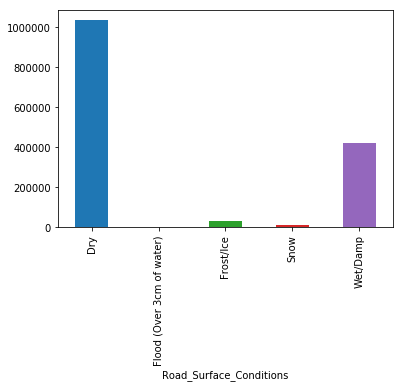

In [25]:
# draw a histogram to know the distribution
data.groupby('Road_Surface_Conditions').size().plot(kind='bar')
plt.show()

In [26]:
# find out the categories from the data
surfaces = data['Road_Surface_Conditions'].dropna().unique()
surfaces.sort()
surfaces

array(['Dry', 'Flood (Over 3cm of water)', 'Frost/Ice', 'Snow',
       'Wet/Damp'], dtype=object)

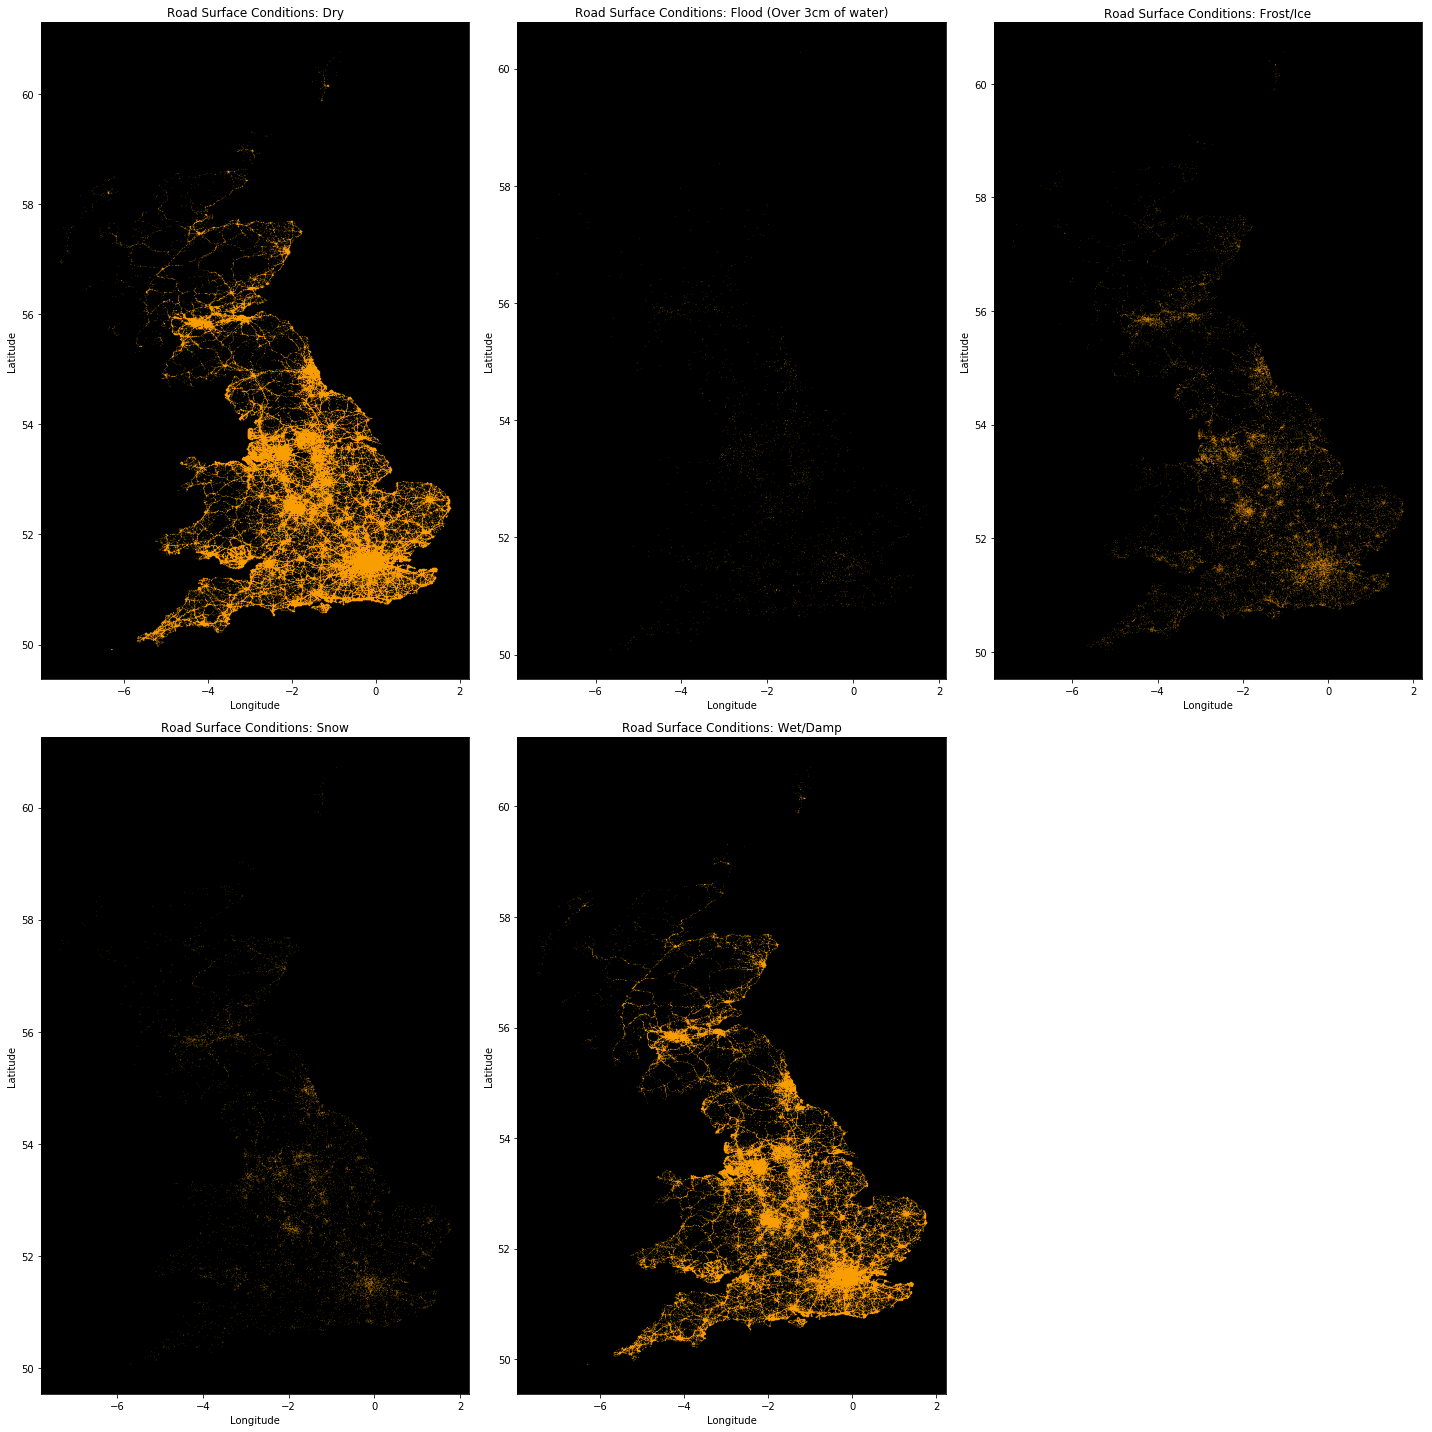

In [27]:
# use subplot to display different results about road surface
fig, axn = plt.subplots(2, 3, figsize=(20, 20))
for i in range(1, 6):
    istr = str(i)
    surface_type = data[data['Road_Surface_Conditions'] == surfaces[i-1]]
    ax = axn.flatten()[i-1]
    surface_type.plot(kind='scatter', x='Longitude', y='Latitude', color='orange',\
                             s=0.01, alpha=0.5, subplots=True, ax=ax)
    ax.set_facecolor('black')
    ax.set_title('Road Surface Conditions: ' + str(surfaces[i-1]))

fig.delaxes(axn.flatten()[5])
fig.tight_layout()
fig.show()

# The Heat Map of Traffic Accidents and Flow

In [28]:
dataAADF.columns

Index(['AADFYear', 'CP', 'Estimation_method', 'Estimation_method_detailed',
       'Region', 'LocalAuthority', 'Road', 'RoadCategory', 'Easting',
       'Northing', 'StartJunction', 'EndJunction', 'LinkLength_km',
       'LinkLength_miles', 'PedalCycles', 'Motorcycles', 'CarsTaxis',
       'BusesCoaches', 'LightGoodsVehicles', 'V2AxleRigidHGV',
       'V3AxleRigidHGV', 'V4or5AxleRigidHGV', 'V3or4AxleArticHGV',
       'V5AxleArticHGV', 'V6orMoreAxleArticHGV', 'AllHGVs', 'AllMotorVehicles',
       'Lat', 'Lon'],
      dtype='object')

## The heat map of traffic flow

In [29]:
# Draw the heat map of traffic flow 
positionAADF = dataAADF.dropna(axis=0, how='any', subset=['Lat','Lon'])[['AADFYear','AllMotorVehicles','Lat','Lon']]
positionArr = [[row['Lat'],row['Lon']] for index, row in positionAADF.iterrows()]

aadf_map = hmap = folium.Map(location=[51.523603, -0.040520], zoom_start = 10)
hmap.add_children(plugins.HeatMap(positionArr, radius=10))
hmap.save('aadfmap.html')

## The heat map of traffic accidents

In [30]:
# draw the whole spots of traffic accidents
whole_data = data.dropna(axis=0, how='any', subset=['Latitude', 'Longitude'])
positionArr = [[row['Latitude'],row['Longitude']] for index, row in whole_data.iterrows()]

heat_map = folium.Map(location=[51.523603, -0.040520], zoom_start = 11)
heat_map.add_children(plugins.HeatMap(positionArr, radius=5))
heat_map.save('whole_heat_map.html')

## The heat map of traffic accidents with time series

In [31]:
whole_map = folium.Map(location=[51.523603, -0.040520], zoom_start = 11)

# Ensure the data are handled in floats
data['Latitude'] = data['Latitude'].astype(float)
data['Longitude'] = data['Longitude'].astype(float)
heat_df = data[['Latitude', 'Longitude']]

# Create weight column, using date
heat_df['Weight'] = data['Date'].dt.month
heat_df['Weight'] = heat_df['Weight'].astype(float)
heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude', 'Weight'])

# List comprehension to make out list of lists
heat_data = [[[row['Latitude'], row['Longitude']] for index, row in heat_df[heat_df['Weight'] == i].iterrows()] for i in range(0,13)]

# Plot it on the map
hm = plugins.HeatMapWithTime(heat_data, max_opacity=0.6, radius=5)
hm.add_to(whole_map)

# Save the map
whole_map.save('whole_map_month.html')